<img style="float: left;padding: 1.3em" src="https://indico.in2p3.fr/event/18313/logo-786578160.png">  

#  Gravitational Wave Open Data Workshop #2


#### Tutorial 2.5:  Parameter estimation for compact object mergers -- Using and interpreting posterior samples

This is a simple demonstration to loading and viewing data released in associaton with the publication titled __Observations of Compact Binary Mergers by Advanced LIGO and Advanced Virgo during the First and Second Observing Runs__ avaliable through [DCC](https://dcc.ligo.org/LIGO-P1800307/public) and [arXiv](https://arxiv.org/). This should lead to discussion and interpretation.

The data used in these tutorials will be downloaded from the public DCC page [LIGO-P1800370](https://dcc.ligo.org/LIGO-P1800370/public).

[Click this link to view this tutorial in Google Colaboratory](https://colab.research.google.com/github/gw-odw/odw-2019/blob/master/Day_2/Tuto_2.5_Parameter_estimation_for_compact_object_mergers.ipynb)

## Installation (execute only if running on a cloud platform!)¶

In [1]:
!wget --output-document=requirements.txt 'https://raw.githubusercontent.com/jkanner/odw-2019/master/nrequirements.txt'
!pip install -r ./requirements.txt

--2020-01-16 00:58:25--  https://raw.githubusercontent.com/jkanner/odw-2019/master/nrequirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     129  --.-KB/s    in 0s      

2020-01-16 00:58:25 (18.7 MB/s) - ‘requirements.txt’ saved [129/129]

     |████████████████████████████████| 28.5MB 1.4MB/s 
     |████████████████████████████████| 1.4MB 39.8MB/s 
     |████████████████████████████████| 3.1MB 37.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5MB 40.6MB/s 
     |████████████████████████████████| 11.8MB 24.2MB/s 
     |████████████

**Important**: With Google Colab, you may need to restart the runtime after running the cell above.

## Initialization

In [0]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import corner

## Get the data

Selecting the event, let's pick GW150914.

In [3]:
label = 'GW150914'

# if you do not have wget installed, simply download manually 
# https://dcc.ligo.org/LIGO-P1800370/public/GW150914_GWTC-1.hdf5 
# from your browser
! wget https://dcc.ligo.org/LIGO-P1800370/public/{label}_GWTC-1.hdf5

--2020-01-16 00:59:48--  https://dcc.ligo.org/LIGO-P1800370/public/GW150914_GWTC-1.hdf5
Resolving dcc.ligo.org (dcc.ligo.org)... 131.215.125.144
Connecting to dcc.ligo.org (dcc.ligo.org)|131.215.125.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dcc.ligo.org/public/0157/P1800370/004/GW150914_GWTC-1.hdf5 [following]
--2020-01-16 00:59:49--  https://dcc.ligo.org/public/0157/P1800370/004/GW150914_GWTC-1.hdf5
Reusing existing connection to dcc.ligo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 7026464 (6.7M)
Saving to: ‘GW150914_GWTC-1.hdf5’

GW150914_GWTC-1.hdf 100%[===================>]   6.70M  26.1MB/s    in 0.3s    

2020-01-16 00:59:49 (26.1 MB/s) - ‘GW150914_GWTC-1.hdf5’ saved [7026464/7026464]



In [0]:
posterior_file = './'+label+'_GWTC-1.hdf5'
posterior = h5py.File(posterior_file, 'r')

### Looking into the file structure

In [5]:
print('This file contains four datasets: ',posterior.keys())

This file contains four datasets:  KeysView(<HDF5 file "GW150914_GWTC-1.hdf5" (mode r)>)


This data file contains several datasets, two using separate models for the gravitaional waveform (`IMRPhenomPv2` and `SEOBNRv3` respectively, see the [paper](https://dcc.ligo.org/LIGO-P1800307) for more details). 

It also contiains a joint dataset, combining equal numbers of samples from each individual model, these datasets are what is shown in the [paper](https://dcc.ligo.org/LIGO-P1800307). 

Finally, there is a dataset containing samples drawn from the prior used for the analyses.

In [6]:
print(posterior['Overall_posterior'].dtype.names)

('costheta_jn', 'luminosity_distance_Mpc', 'right_ascension', 'declination', 'm1_detector_frame_Msun', 'm2_detector_frame_Msun', 'spin1', 'spin2', 'costilt1', 'costilt2')


Here are some brief descriptions of these parameters and their uses:

 * `luminosity_distance_Mpc`: luminosity distance [Mpc]

 * `m1_detector_frame_Msun`: primary (larger) black hole mass (detector frame) [solar mass]

 * `m2_detector_frame_Msun`: secondary (smaller) black hole mass (detector frame) [solar mass]

 * `right_ascension`, `declination`: right ascension and declination of the source [rad].

 * `costheta_jn`: cosine of the angle between line of sight and total angular momentum vector of system.

 * `spin1`, `costilt1`: primary (larger) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.

 * `spin2`, `costilt2`: secondary (smaller) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.

A convenient (and pretty) way to load up this array of samples is to use [pandas](https://pandas.pydata.org/):

In [0]:
samples=pd.DataFrame.from_records(np.array(posterior['Overall_posterior']))

In [8]:
samples

,costheta_jn,luminosity_distance_Mpc,right_ascension,declination,m1_detector_frame_Msun,m2_detector_frame_Msun,spin1,spin2,costilt1,costilt2
0,-0.976633,517.176717,1.456176,-1.257815,39.037380,37.044563,0.417147,0.867740,-0.280624,0.403853
1,-0.700404,401.626864,2.658802,-0.874661,34.620096,34.184416,0.125709,0.260679,-0.757349,-0.312285
2,-0.840752,369.579071,1.106548,-1.136396,37.894343,33.970520,0.581047,0.926893,0.649781,-0.510843
3,-0.583657,386.935268,2.077180,-1.246351,36.412973,35.684463,0.235808,0.094391,0.116578,-0.720505
4,-0.928271,345.104345,0.993604,-1.069243,39.477251,31.645008,0.511521,0.868009,-0.438237,0.269333
...,...,...,...,...,...,...,...,...,...,...
8345,-0.691637,306.985025,1.485646,-1.269228,37.561962,33.355792,0.484003,0.627191,0.194507,-0.408345
8346,-0.834615,462.649414,2.065362,-1.265618,37.824298,36.674075,0.589654,0.650758,-0.737792,0.875384
8347,-0.911463,448.930876,1.536913,-1.257956,38.063291,35.757913,0.708407,0.714805,0.852085,-0.797475
8348,-0.856914,561.020036,2.367289,-1.211824,44.884396,31.592433,0.389284,0.521304,-0.251461,0.830526


Those are all the samples stored in the `Overall` dataset. 

### Plotting

We can plot all of them with, for instance, the [corner](https://corner.readthedocs.io/en/latest/) package:

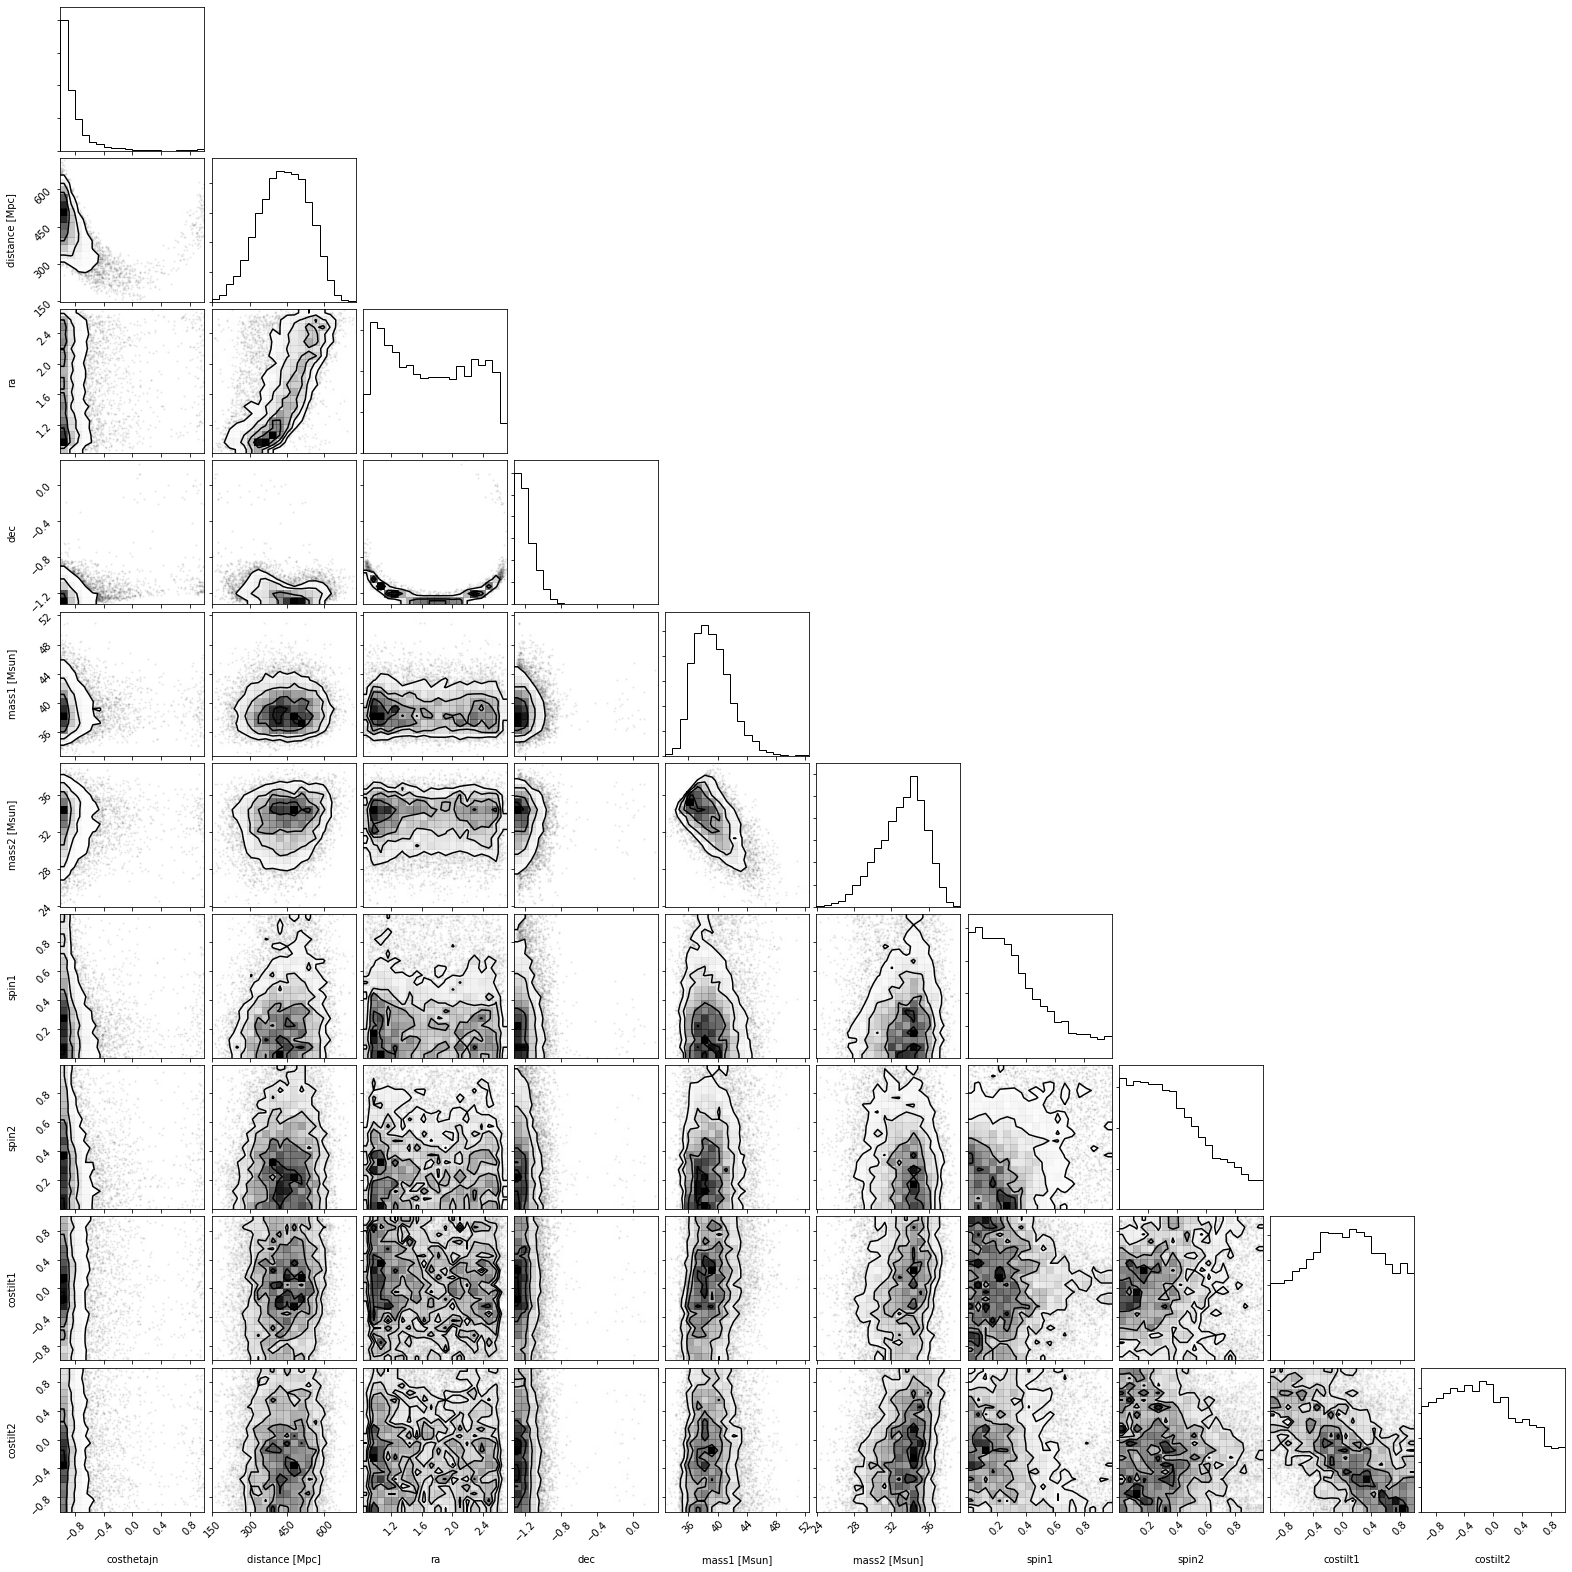

In [9]:
corner.corner(samples,labels=['costhetajn',
                                'distance [Mpc]',
                                'ra',
                                'dec',
                                'mass1 [Msun]',
                                'mass2 [Msun]',
                                'spin1',
                                'spin2',
                                'costilt1',
                                'costilt2']);

Each one and two dimentional histogram are *marginalised* probabilby density functions. We can manualy select one parameter, say `luminosity distance`, and plot the four different marginalised distributions:

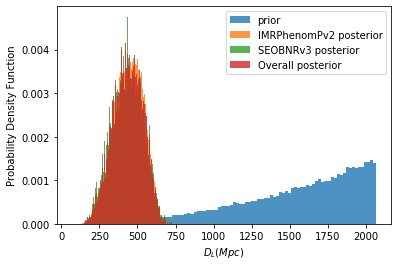

In [10]:
plt.hist(posterior['prior']['luminosity_distance_Mpc'], bins = 100, label='prior', alpha=0.8, density=True)
plt.hist(posterior['IMRPhenomPv2_posterior']['luminosity_distance_Mpc'], bins = 100, label='IMRPhenomPv2 posterior', alpha=0.8, density=True)
plt.hist(posterior['SEOBNRv3_posterior']['luminosity_distance_Mpc'], bins = 100, label='SEOBNRv3 posterior', alpha=0.8, density=True)
plt.hist(posterior['Overall_posterior']['luminosity_distance_Mpc'], bins = 100, label='Overall posterior', alpha=0.8, density=True)
plt.xlabel(r'$D_L (Mpc)$')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

### Computing new quantities

The masses given are the ones seens by the detector, in the "detector frame". To get the masses of the source black holes, we need to correct for the gravitational-wave redshifting. This forces us to assume a cosmology:

In [0]:
import astropy.units as u
from astropy.cosmology import Planck15, z_at_value

We now compute the redshift value for all the samples (using only their distance value). See [astropy.cosmology](http://docs.astropy.org/en/stable/api/astropy.cosmology.z_at_value.html) for implementation details, in particular how to make the following more efficient:

In [0]:
z = np.array([z_at_value(Planck15.luminosity_distance, dist * u.Mpc) for dist in samples['luminosity_distance_Mpc']])

In [0]:
samples['m1_source_frame_Msun']=samples['m1_detector_frame_Msun']/(1.0+z)
samples['m2_source_frame_Msun']=samples['m2_detector_frame_Msun']/(1.0+z)
samples['redshift']=z

And we can plot the marginalised probability density functions:

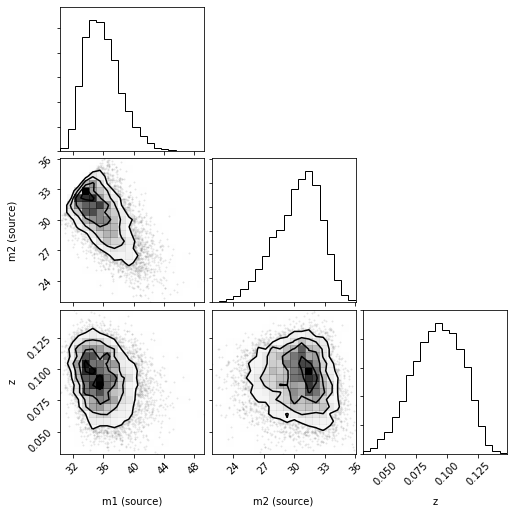

In [14]:
corner.corner(samples[['m1_source_frame_Msun','m2_source_frame_Msun','redshift']],labels=['m1 (source)',
                                                                                          'm2 (source)',
                                                                                          'z']);

By the way, what's the prior in the redshift?

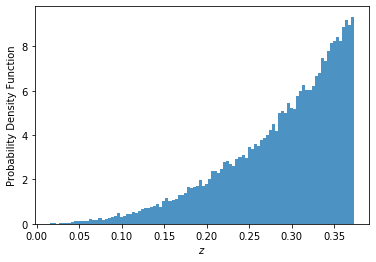

In [15]:
prior=pd.DataFrame.from_records(np.array(posterior['prior']))
z = np.array([z_at_value(Planck15.luminosity_distance, dist * u.Mpc) for dist in prior['luminosity_distance_Mpc']])
plt.hist(z, bins = 100, label='prior', alpha=0.8, density=True)
plt.xlabel(r'$z$')
plt.ylabel('Probability Density Function')
plt.show()